In [39]:
import numpy as np
import math
import scipy.stats as stats
import seaborn as sns

In [20]:
def z_score(confidence_level):
    """
    Calculate the z-score corresponding to the given confidence level.

    Parameters:
        confidence_level (float): The desired confidence level (between 0 and 1).

    Returns:
        float: The z-score corresponding to the given confidence level.
    """
    return stats.norm.ppf((1 + confidence_level) / 2).round(2)


In [21]:
z_score(0.95)

1.96

In [30]:
def calculate_sample_size(z, p, margin_error, N=None):
    """
    Calculate the required sample size for estimating a population proportion
    with a given margin of error and confidence level.

    Parameters:
        z (float): The z-score corresponding to the desired confidence level.
        p (float): The estimated proportion of the population.
        margin_error (float): The desired margin of error.
        N (int, optional): The population size. If None, assumes infinite population.

    Returns:
        float: The required sample size.
    """
    if N is None:
        sample_size = ((z**2) * p * (1 - p)) / (margin_error**2)
    else:
        sample_size = ((z**2) * p * (1 - p) * N) / (((z**2) * p * (1 - p)) + ((margin_error**2) * N - 1))

    return math.ceil(sample_size)


In [66]:
def simulate_sample_size(z=1.96, p=0.5, margin_error=0.05):

  sim_marg_error = []

  for N in range(1,1000000,1000):

    sample_size = calculate_sample_size(z, p, margin_error,N=N)

    sim_marg_error.append(sample_size)

  return sim_marg_error


In [67]:
calculate_sample_size(z=1.96, p=0.5, margin_error=0.05)

385

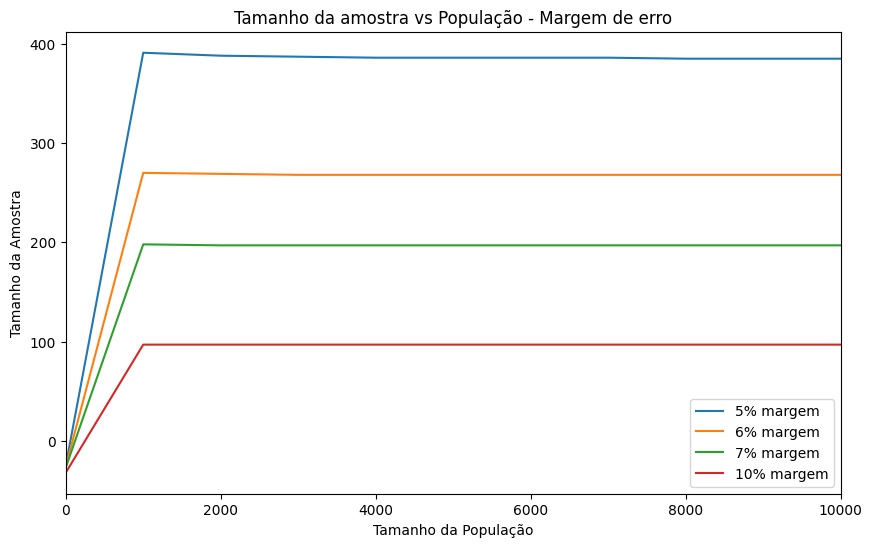

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot with a logarithmic x-axis
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=range(1, 1000000, 1000), y= simulate_sample_size(z=1.96, p=0.5, margin_error=0.05),label = '5% margem')
sns.lineplot(x=range(1, 1000000, 1000), y= simulate_sample_size(z=1.96, p=0.5, margin_error=0.06),label = '6% margem')
sns.lineplot(x=range(1, 1000000, 1000), y= simulate_sample_size(z=1.96, p=0.5, margin_error=0.07),label = '7% margem')
sns.lineplot(x=range(1, 1000000, 1000), y= simulate_sample_size(z=1.96, p=0.5, margin_error=0.10),label = '10% margem')
plt.xlabel('Tamanho da População')  # Set x-axis label
plt.ylabel('Tamanho da Amostra')  # Set y-axis label
plt.title('Tamanho da amostra vs População - Margem de erro')  # Set title
plt.xlim(0,10000)
plt.show()


# A partir de N = 1000 não faz muita diferença o tamanho da população independente do intervalo de confiança.

In [74]:
# Dado o plato de tamanho de amostra simular incremento de margem de erro em relação ao incremento

sim_sample_size = []

for me in np.arange(0.01,0.1,0.01):

  sample_size = calculate_sample_size(z=1.96, p=0.5, margin_error=me, N=2000)

  sim_sample_size.append(sample_size)

Text(0.5, 1.0, 'Tamanho da amostra vs Margem de erro')

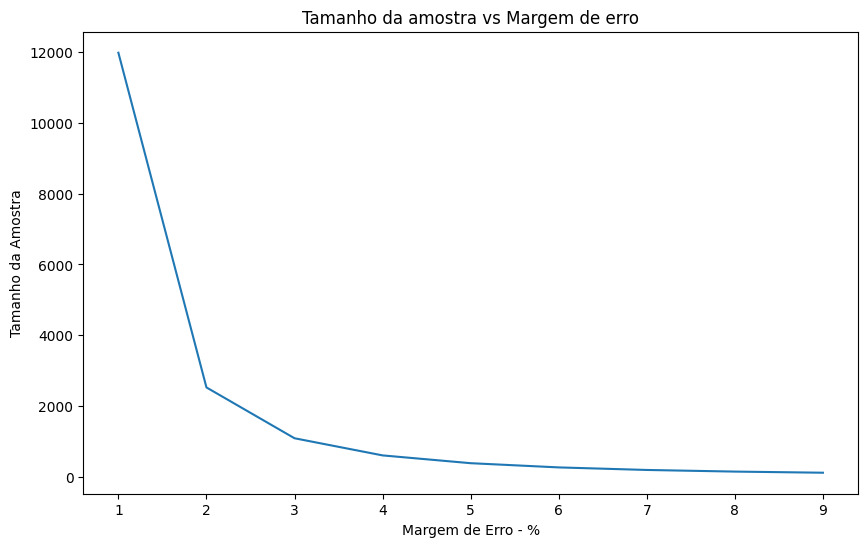

In [78]:
# Create a line plot with a logarithmic x-axis
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=np.arange(0.01,0.1,0.01)*100, y= sim_sample_size)
plt.xlabel('Margem de Erro - %')  # Set x-axis label
plt.ylabel('Tamanho da Amostra')  # Set y-axis label
plt.title('Tamanho da amostra vs Margem de erro')  # Set title

In [81]:
# Dado a proporção esperada dos entrevistados:

sim_sample_size = []

for p in np.arange(0.1,1,0.1):

  sample_size = calculate_sample_size(z=1.96, p=p, margin_error=0.05, N=2000)

  sim_sample_size.append(sample_size)

Text(0.5, 1.0, 'Tamanho da amostra vs Margem de erro')

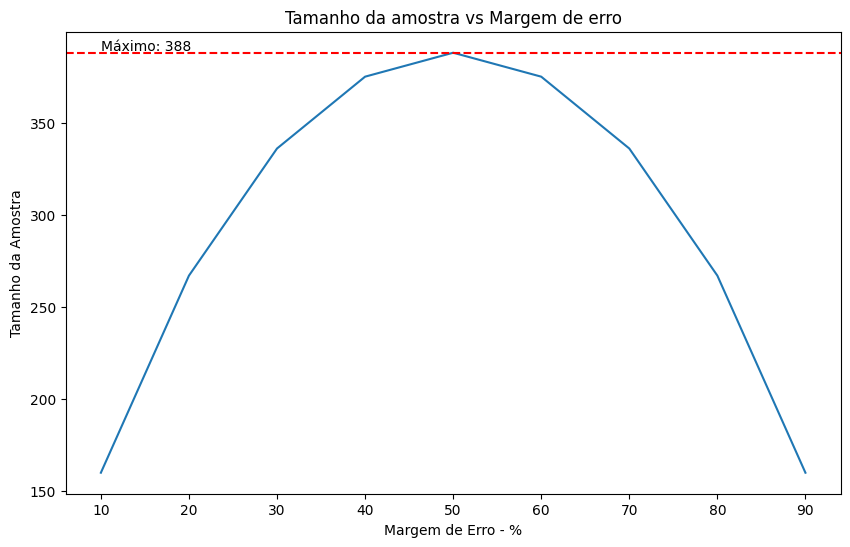

In [98]:
# Create a line plot with a logarithmic x-axis
plt.figure(figsize=(10, 6))  # Set the figure size
sns.lineplot(x=np.arange(0.1,1,0.1)*100, y= sim_sample_size)
plt.axhline(np.max(sim_sample_size), color='red', linestyle='--')  # Dotted line
plt.text(10, np.max(sim_sample_size)+1, f'Máximo: {np.max(sim_sample_size)}', color='black')
plt.xlabel('Margem de Erro - %')  # Set x-axis label
plt.ylabel('Tamanho da Amostra')  # Set y-axis label
plt.title('Tamanho da amostra vs Margem de erro')  # Set title

# Garantindo 0.5 vamos usar o caso mais pessimista, por exemplo se não sei que meu objeto de pesquisa é X% de proporção calculo com maior incerteza 50% de chance